# Exploratory Data Analysis-EDA

*Importar Librerías*

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import os

*Crear Función para Verificar el Tipo de Datos*

Esta función recorre cada columna del DataFrame, recopila la información solicitada y la almacena en listas. Luego, crea un DataFrame a partir de estas listas y lo devuelve como salida. 

In [1]:
def verificar_tipo_datos(df):
    # Se inicializan las listas que contendrán la información sobre cada columna del DataFrame
    nombre_campo = []
    tipo_datos = []
    no_nulos_porcentaje = []
    nulos_porcentaje = []
    nulos = []

    # Se recorre cada columna del DataFrame
    for columna in df.columns:
        # Se obtiene el nombre de la columna
        nombre_campo.append(columna)
        # Se obtiene el tipo de datos de la columna
        tipo_dato = type(df[columna][0])
        tipo_datos.append(tipo_dato)
        # Se calcula el porcentaje de valores no nulos en la columna
        porcentaje_no_nulos = df[columna].count() / len(df) * 100
        no_nulos_porcentaje.append(round(porcentaje_no_nulos, 2))
        # Se calcula el porcentaje de valores nulos en la columna
        porcentaje_nulos = 100 - porcentaje_no_nulos
        nulos_porcentaje.append(round(porcentaje_nulos, 2))
        # Se cuenta la cantidad de valores nulos en la columna
        cantidad_nulos = df[columna].isnull().sum()
        nulos.append(cantidad_nulos)

    # Se crea un DataFrame con la información recolectada
    df_info = pd.DataFrame({
        "nombre_campo": nombre_campo,
        "tipo_datos": tipo_datos,
        "no_nulos_%": no_nulos_porcentaje,
        "nulos_%": nulos_porcentaje,
        "nulos": nulos
    })

    return df_info


*Crear Función para Bigote Superior*

Esta función calcula el bigote superior utilizando la fórmula del rango intercuartílico (IQR). Luego, cuenta la cantidad de valores atípicos que están por encima del bigote superior. La función quantile() se utiliza para calcular los cuartiles de la columna. Finalmente, se imprime el valor del bigote superior y la cantidad de valores atípicos encontrados en la columna.

In [2]:
def bigote_max(columna):
    # Cuartiles
    q1 = columna.quantile(0.25)
    q3 = columna.quantile(0.75)

    # Rango intercuartílico
    iqr = q3 - q1

    # Valor del bigote superior
    bigote_max = q3 + 1.5 * iqr

    print(f'El bigote superior de la variable {columna.name} se ubica en: $ {bigote_max:.2f}')

    # Cantidad de atípicos
    cantidad_atipicos = (columna > bigote_max).sum()
    print(f'Hay {cantidad_atipicos} valores atípicos en la variable {columna.name}')


## EDA de 'user_reviews'

In [5]:
# Ruta del archivo CSV
file_path = '../Data/Processed/Clean_data/user_reviews_cleaned.csv'

# Leer el archivo CSV en un dataframe
df_reviews = pd.read_csv(file_path)

# Mostrar las primeras filas del dataframe para verificar que se cargaron correctamente
df_reviews.head()


,item_id,recommend,user_id,year,sentiment_analysis
0,10,True,76561198040188061,2011,2
1,10,True,epic_doom,2013,1
2,10,True,mayshowganmore,2014,2
3,10,True,BestinTheWorldThund3r,2014,2
4,10,True,76561198072207162,2014,2


In [6]:
verificar_tipo_datos(df_reviews)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,item_id,<class 'numpy.int64'>,100.0,0.0,0
1,recommend,<class 'numpy.bool_'>,100.0,0.0,0
2,user_id,<class 'str'>,100.0,0.0,0
3,year,<class 'numpy.int64'>,100.0,0.0,0
4,sentiment_analysis,<class 'numpy.int64'>,100.0,0.0,0


In [7]:
def resumen_cant_porcentaje(df, columna):
  
    # Obtiene la serie de la columna
    serie_columna = df[columna]

    # Contabiliza la cantidad de valores únicos y sus frecuencias
    unique_counts = serie_columna.value_counts()

    # Calcula el porcentaje de cada valor único
    porcentajes = round(100 * unique_counts / len(df), 2)

    # Crea un DataFrame con el resumen
    df_resultado = pd.DataFrame({
        'Cantidad': unique_counts,
        'Porcentaje': porcentajes
    })

    return df_resultado


In [8]:
resumen_cant_porcentaje(df_reviews, 'sentiment_analysis')

,Cantidad,Porcentaje
sentiment_analysis,,
2,32237,71.50
0,7617,16.89
1,5231,11.60


In [9]:
resumen_cant_porcentaje(df_reviews, 'recommend')

,Cantidad,Porcentaje
recommend,,
True,39484,87.58
False,5601,12.42


In [10]:
def resumen_dos_columnas(df, columna_1, columna_2):
    '''
    Agrupa por las columnas especificadas y calcula la cantidad y el porcentaje para cada grupo.

    Parameters:
    - df (DataFrame): El DataFrame que contiene los datos de las reseñas.
    - columna_sentimiento (str): El nombre de la columna que representa el sentimiento de la reseña.
    - columna_recomendacion (str): El nombre de la columna que indica si la reseña recomienda o no el producto.

    Returns:
    DataFrame: Un DataFrame que resume la cantidad y el porcentaje de reseñas para cada combinación de valores en las columnas especificadas.
    '''
    # Se agrupa por las columnas especificadas y se cuenta la cantidad de reseñas en cada grupo
    cantidad_grupo = df.groupby([columna_1, columna_2]).size()

    # Se calcula el porcentaje para cada grupo
    porcentaje_grupo = 100 * cantidad_grupo / len(df)

    # Se crea un DataFrame con el resumen
    resumen_dos_columnas = pd.DataFrame({
        "Cantidad": cantidad_grupo,
        "Porcentaje": porcentaje_grupo
    })

    return resumen_dos_columnas


In [11]:
resumen_dos_columnas(df_reviews, 'sentiment_analysis', 'recommend')

Cantidad  Porcentaje
sentiment_analysis recommend                      
0                  False          2208    4.897416
                   True           5409   11.997338
1                  False           800    1.774426
                   True           4431    9.828102
2                  False          2593    5.751359
                   True          29644   65.751359

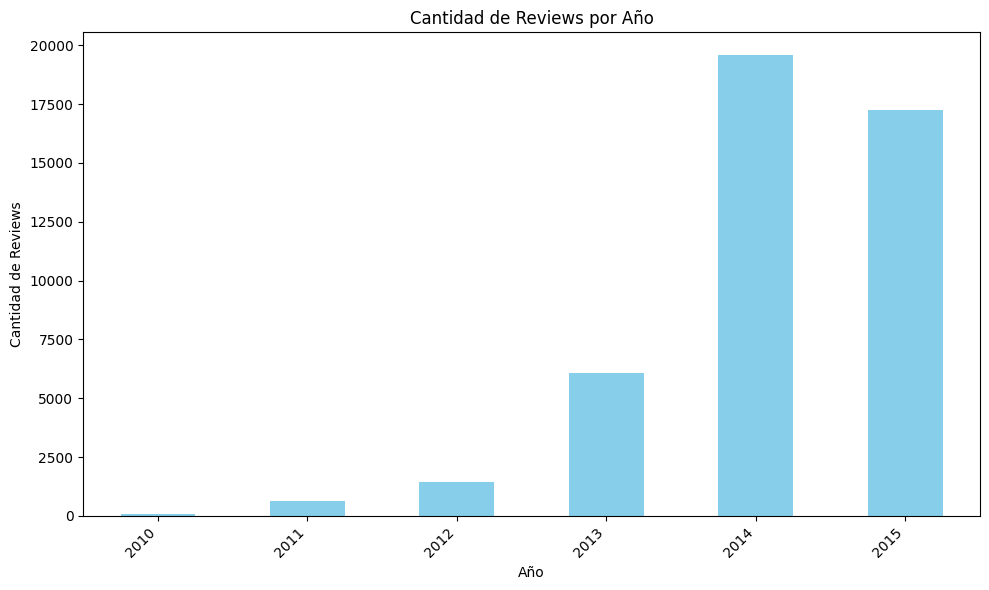

In [14]:
# Agrupamos por año y contamos la cantidad de reseñas
cantidad_reviews_por_año = df_reviews['year'].value_counts().sort_index()

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
cantidad_reviews_por_año.plot(kind='bar', color='skyblue')

# Configuramos el título y las etiquetas de los ejes
plt.title('Cantidad de Reviews por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reviews')

# Mostramos el gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## EDA de 'steam_games'

In [20]:
# Ruta del archivo CSV
file_path = '../Data/Processed/Clean_data/steam_games_cleaned.csv'

# Leer el archivo CSV en un dataframe
df_games = pd.read_csv(file_path)

# Mostrar las primeras filas del dataframe para verificar que se cargaron correctamente
df_games.head()

,genres,item_name,tags,specs,price,item_id,developer,year
0,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",Lost Summoner Kitty,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,761140,Kotoshiro,2018
1,"['Free to Play', 'Strategy', 'Indie', 'RPG']",Ironbound,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...","['Single-player', 'Multi-player', 'Online Mult...",0.00,643980,Secret Level SRL,2018
2,"['Free to Play', 'Simulation', 'Sports', 'Casu...",Real Pool 3D - Poolians,"['Free to Play', 'Simulation', 'Sports', 'Casu...","['Single-player', 'Multi-player', 'Online Mult...",0.00,670290,Poolians.com,2017
3,"['Action', 'Adventure', 'Casual']",弹炸人2222,"['Action', 'Adventure', 'Casual']",['Single-player'],0.99,767400,彼岸领域,2017
4,"['Action', 'Indie', 'Casual', 'Sports']",Log Challenge,"['Action', 'Indie', 'Casual', 'Sports']","['Single-player', 'Full controller support', '...",2.99,773570,NaN,2016


In [18]:
verificar_tipo_datos(df_games)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,genres,<class 'str'>,99.57,0.43,138
1,item_name,<class 'str'>,100.00,0.00,0
2,tags,<class 'str'>,99.50,0.50,162
3,specs,<class 'str'>,97.92,2.08,669
4,price,<class 'numpy.float64'>,100.00,0.00,0
5,item_id,<class 'numpy.int64'>,100.00,0.00,0
6,developer,<class 'str'>,89.94,10.06,3233
7,year,<class 'numpy.int64'>,100.00,0.00,0


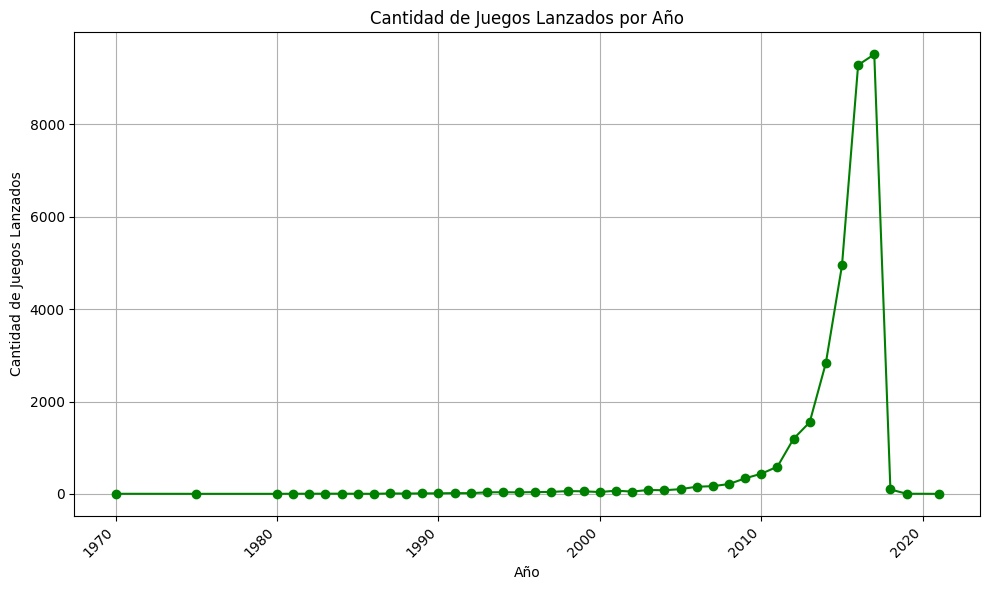

In [21]:
# Contamos la cantidad de juegos lanzados por año
cantidad_juegos_por_año = df_games['year'].value_counts().sort_index()

# Creamos el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(cantidad_juegos_por_año.index, cantidad_juegos_por_año.values, marker='o', color='green', linestyle='-')

# Configuramos el título y las etiquetas de los ejes
plt.title('Cantidad de Juegos Lanzados por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos Lanzados')

# Mostramos el gráfico
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


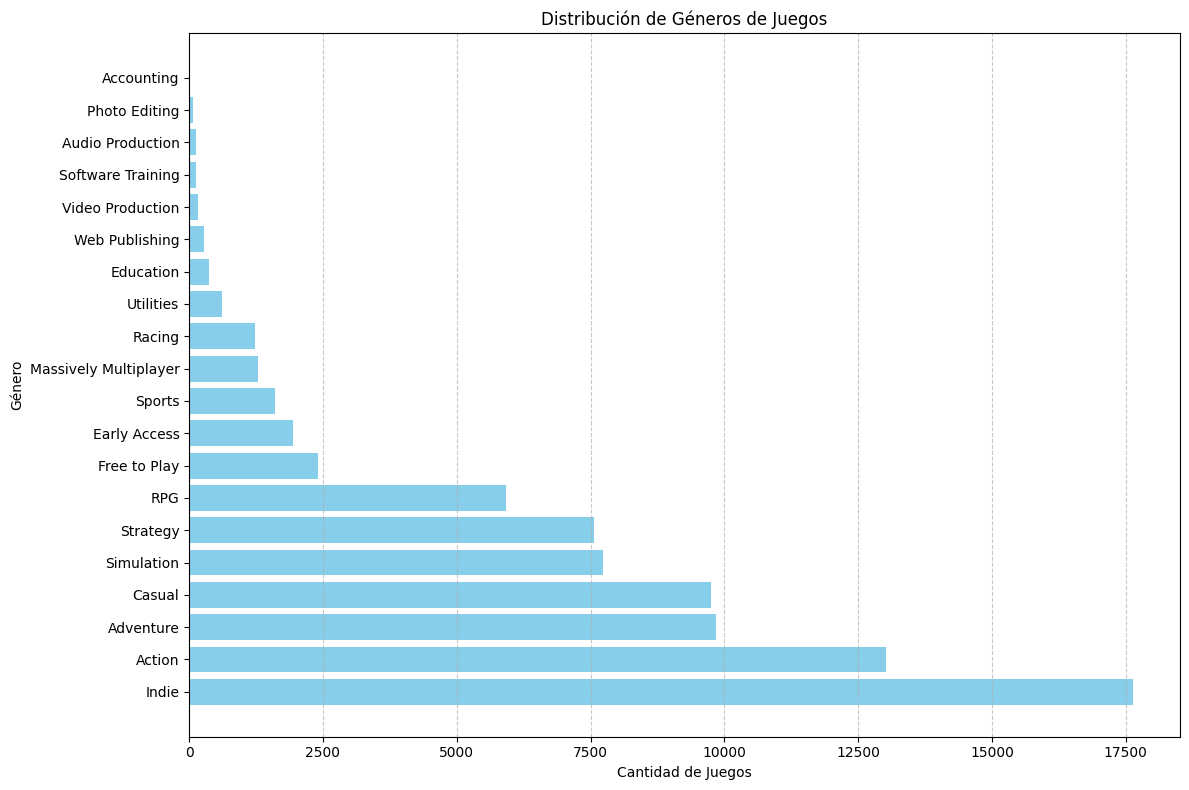

In [23]:
# Eliminar filas con valores NaN en la columna 'genres'
df_games.dropna(subset=['genres'], inplace=True)

# Convertir la columna 'genres' a una lista de Python
df_games['genres'] = df_games['genres'].apply(ast.literal_eval)

# Utilizar el método explode para expandir las listas de la columna 'genres'
generos_totales = df_games['genres'].explode()

# Encontrar los géneros únicos
generos_unicos = generos_totales.unique()

# Contar la cantidad de juegos por género
cantidad_juegos_por_genero = generos_totales.value_counts()

# Crear un DataFrame para los géneros únicos y la cantidad de juegos
df_generos = pd.DataFrame({'Género': cantidad_juegos_por_genero.index, 'Cantidad': cantidad_juegos_por_genero.values})

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.barh(df_generos['Género'], df_generos['Cantidad'], color='skyblue')

# Configurar el título y las etiquetas de los ejes
plt.title('Distribución de Géneros de Juegos')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Género')

# Mostrar el gráfico
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [28]:
resumen_cant_porcentaje(df_games, 'year')

,Cantidad,Porcentaje
year,,
2017,9506,29.71
2016,9226,28.84
2015,4922,15.38
2014,2813,8.79
2013,1544,4.83
2012,1184,3.70
2011,581,1.82
2010,434,1.36
2009,335,1.05


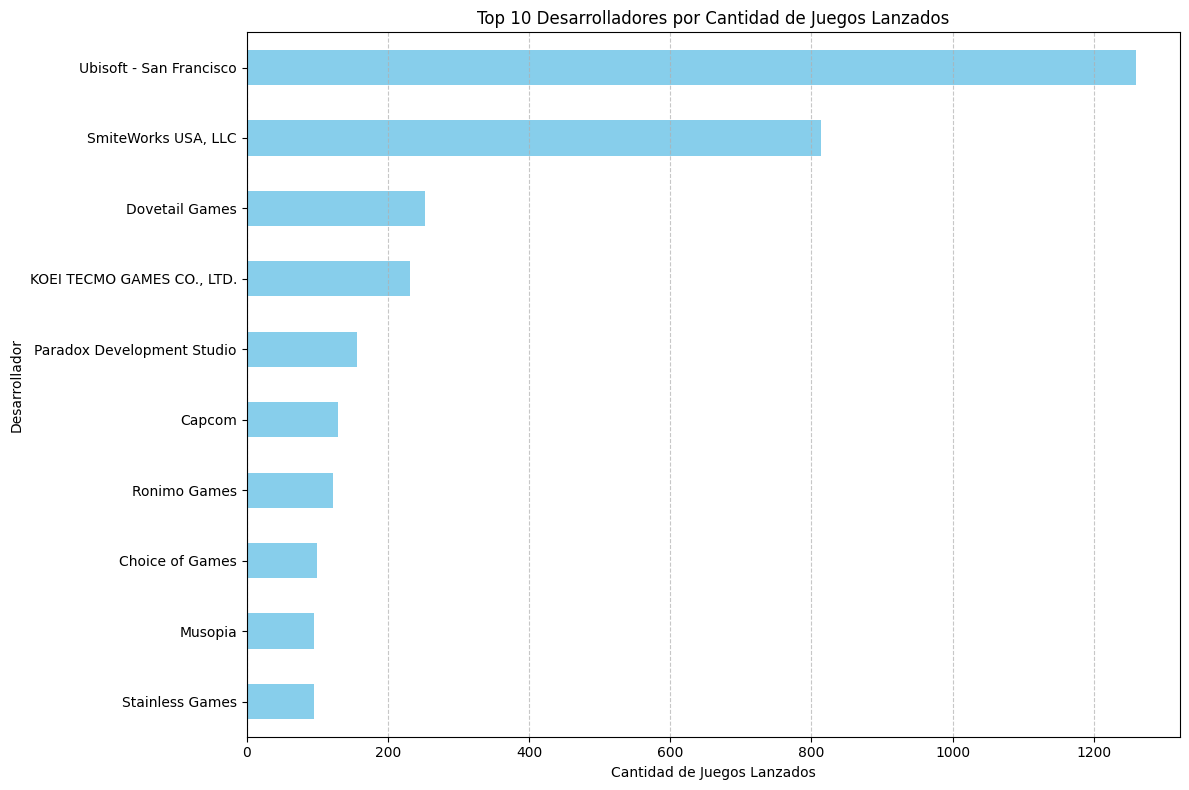

In [29]:
# Obtener los 10 principales desarrolladores por la cantidad de juegos lanzados
top_desarrolladores = df_games['developer'].value_counts().head(10)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 8))
top_desarrolladores.plot(kind='barh', color='skyblue')

# Configuración del título y las etiquetas de los ejes
plt.title('Top 10 Desarrolladores por Cantidad de Juegos Lanzados')
plt.xlabel('Cantidad de Juegos Lanzados')
plt.ylabel('Desarrollador')

# Mostrar el gráfico
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el desarrollador con la mayor cantidad en la parte superior
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

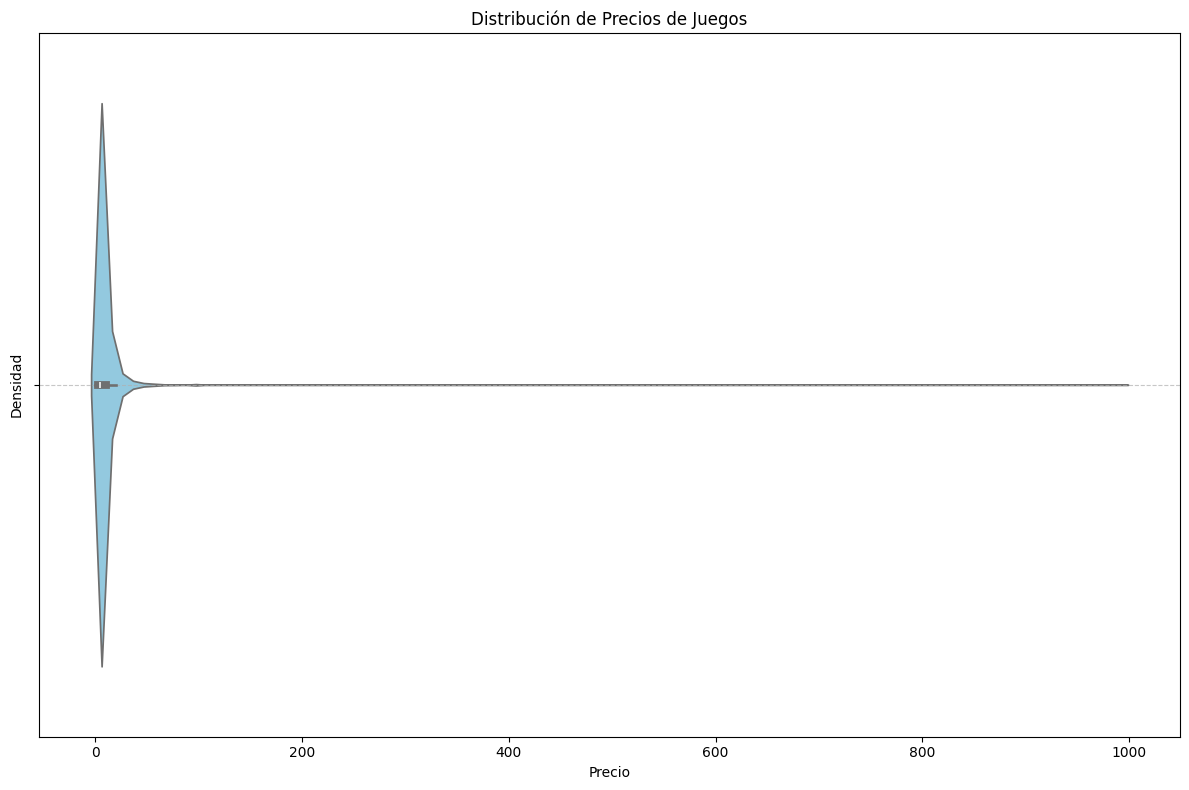

In [32]:
# Eliminar valores NaN en la columna 'price'
df_games_cleaned = df_games.dropna(subset=['price'])

# Convertir la columna 'price' a tipo float
df_games_cleaned['price'] = df_games_cleaned['price'].astype(float)

# Crear el gráfico de violín
plt.figure(figsize=(12, 8))
sns.violinplot(x='price', data=df_games_cleaned, color='skyblue')

# Configuración del título y etiquetas de los ejes
plt.title('Distribución de Precios de Juegos')
plt.xlabel('Precio')
plt.ylabel('Densidad')

# Mostrar el gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
def resumen_precios(df, columna):
    """
    Calcula estadísticas resumidas sobre los precios de los juegos.

    Parameters:
    - df (DataFrame): DataFrame que contiene los datos de los juegos.
    - columna (str): Nombre de la columna que contiene los precios.

    Returns:
    - str: Mensaje con las estadísticas resumidas sobre los precios.
    """
    # Calcula las estadísticas resumidas de los precios
    precio_medio = df[columna].median()
    precio_promedio = df[columna].mean()
    precio_percentil_75 = df[columna].quantile(0.75)
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    bigote_superior = round(q3 + 1.5*(q3 - q1), 2)
    cantidad_atipicos = (df[columna] > bigote_superior).sum()

    # Crea el mensaje con las estadísticas resumidas
    mensaje = (
        f"El precio medio (mediana) de los juegos es de: $ {precio_medio}\n"
        f"El precio promedio (mean) de los juegos es de: $ {precio_promedio:.2f}\n"
        f"El 75% de los juegos tienen un precio menor de: $ {precio_percentil_75}\n"
        f"El bigote superior de la variable {columna} se ubica en: $ {bigote_superior}\n"
        f"Hay {cantidad_atipicos} valores atípicos en la variable {columna}"
    )

    return mensaje

In [34]:
mensaje_precios = resumen_precios(df_games, 'price')
print(mensaje_precios)

El precio medio (mediana) de los juegos es de: $ 4.99
El precio promedio (mean) de los juegos es de: $ 8.74
El 75% de los juegos tienen un precio menor de: $ 9.99
El bigote superior de la variable price se ubica en: $ 20.49
Hay 1882 valores atípicos en la variable price


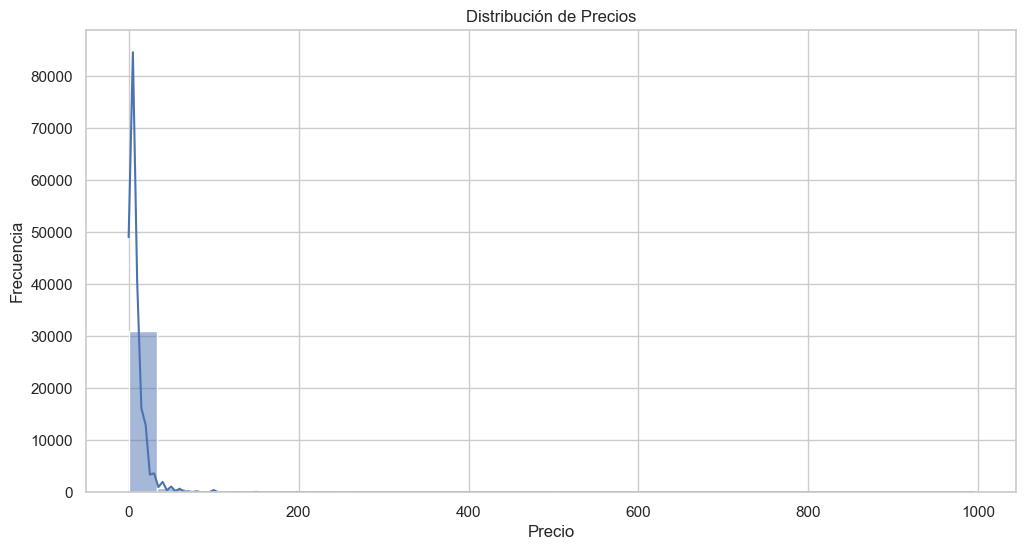

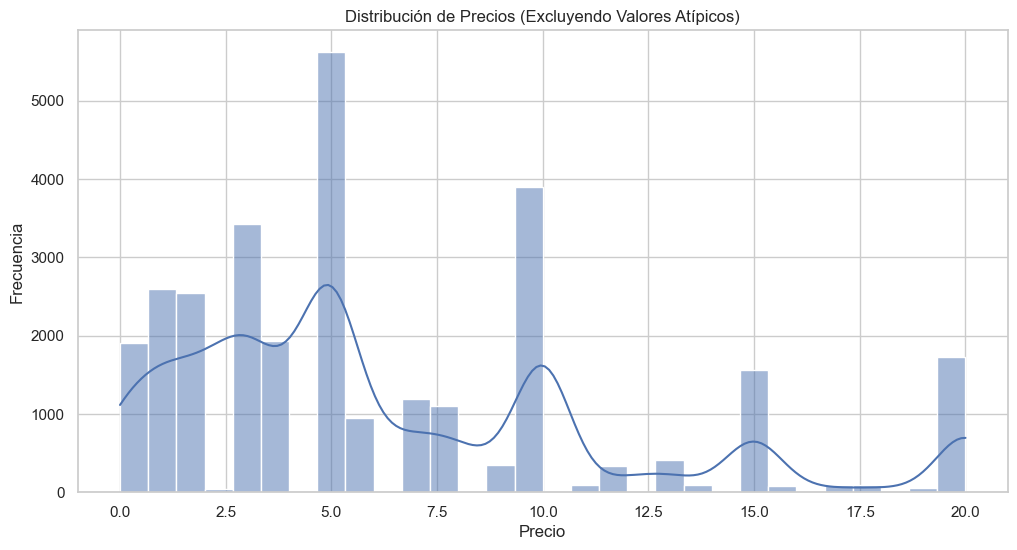

In [38]:
# Valores atípicos (outliers)
Q1 = df_games['price'].quantile(0.25)
Q3 = df_games['price'].quantile(0.75)
IQR = Q3 - Q1
valores_atipicos = ((df_games['price'] < (Q1 - 1.5 * IQR)) | (df_games['price'] > (Q3 + 1.5 * IQR)))

# Gráfico para todos los precios
plt.figure(figsize=(12, 6))
sns.histplot(df_games['price'], bins=30, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico excluyendo valores atípicos
plt.figure(figsize=(12, 6))
sns.histplot(df_games.loc[~valores_atipicos, 'price'], bins=30, kde=True)
plt.title('Distribución de Precios (Excluyendo Valores Atípicos)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


## EDA de 'user_items'

In [40]:
# Ruta del archivo CSV
file_path = '../Data/Processed/Clean_data/user_items_cleaned.csv'

# Leer el archivo CSV en un dataframe
df_items = pd.read_csv(file_path)

# Mostrar las primeras filas del dataframe para verificar que se cargaron correctamente
df_items.head()

,item_id,hours_played,user_id
0,10,0.10,76561197970982479
1,20,0.00,76561197970982479
2,30,0.12,76561197970982479
3,40,0.00,76561197970982479
4,50,0.00,76561197970982479


In [41]:
verificar_tipo_datos(df_items)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,item_id,<class 'numpy.int64'>,100.0,0.0,0
1,hours_played,<class 'numpy.float64'>,100.0,0.0,0
2,user_id,<class 'str'>,100.0,0.0,0


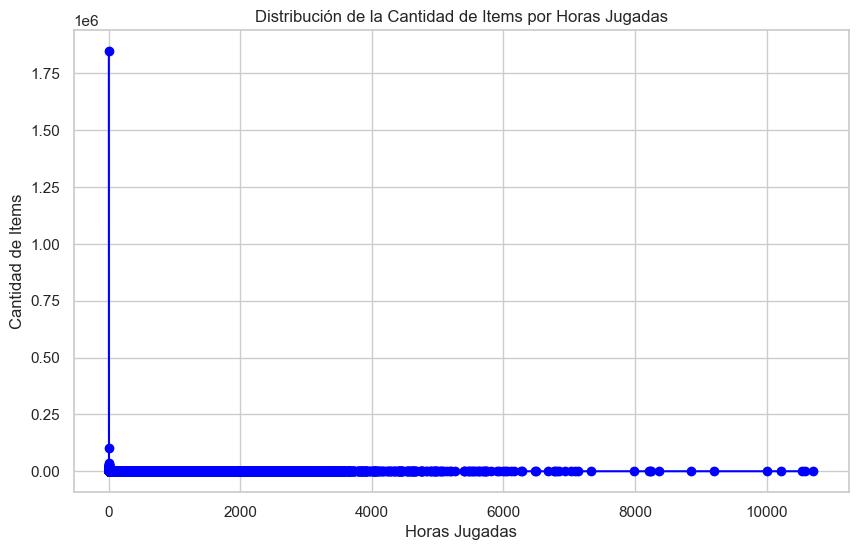

In [44]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(df_items['hours_played'].value_counts().sort_index(), marker='o', color='blue', linestyle='-')
plt.title('Distribución de la Cantidad de Items por Horas Jugadas')
plt.xlabel('Horas Jugadas')
plt.ylabel('Cantidad de Items')
plt.grid(True)
plt.show()

In [45]:
# Calcular la cantidad de items con hours_played igual a 0
items_hours_zero = (df_items['hours_played'] == 0).sum()

# Calcular el porcentaje
porcentaje_hours_zero = (items_hours_zero / len(df_items)) * 100

print(f"Número de items con hours_played igual a 0: {items_hours_zero}")
print(f"Porcentaje de items con hours_played igual a 0: {porcentaje_hours_zero:.2f}%")


Número de items con hours_played igual a 0: 1847730
Porcentaje de items con hours_played igual a 0: 36.27%


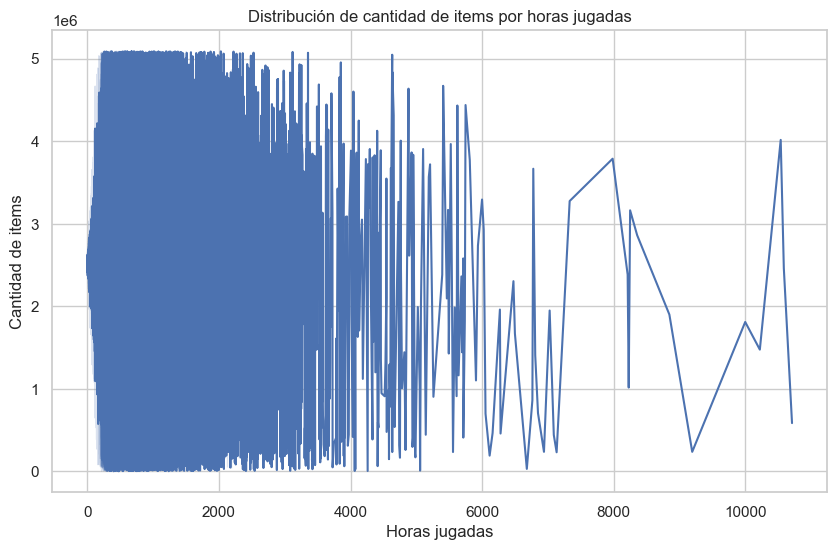

In [46]:
# Filtrar los valores de hours_played que no sean igual a 0
df_items_non_zero = df_items[df_items['hours_played'] != 0]

# Trazar el gráfico de distribución de horas jugadas
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_items_non_zero['hours_played'], y=df_items_non_zero.index)
plt.title('Distribución de cantidad de items por horas jugadas')
plt.xlabel('Horas jugadas')
plt.ylabel('Cantidad de items')
plt.grid(True)
plt.show()
